In [1]:
import os
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', '43b0da3c680441c69921b8d73d8de44c')

In [4]:
results = search_images_bing(key, 'gorilla')
ims = results.attrgot('content_url')
len(ims)

150

In [5]:
ape_types = 'gorilla','chimp'
path = Path('apes')

In [6]:
if not path.exists():
    path.mkdir()
    for o in ape_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        download_images(dest, urls=results.attrgot('content_url'))

In [7]:
fns = get_image_files(path)
fns

(#283) [Path('apes/chimp/00000000.jpg'),Path('apes/chimp/00000001.jpg'),Path('apes/chimp/00000002.jpg'),Path('apes/chimp/00000003.jpg'),Path('apes/chimp/00000004.jpg'),Path('apes/chimp/00000005.jpg'),Path('apes/chimp/00000006.jpg'),Path('apes/chimp/00000007.jpg'),Path('apes/chimp/00000008.jpg'),Path('apes/chimp/00000009.jpg')...]

In [8]:
failed = verify_images(fns)
failed

(#0) []

In [9]:
failed.map(Path.unlink);

In [10]:
apes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [11]:
apes = apes.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = apes.dataloaders(path, num_workers=0)

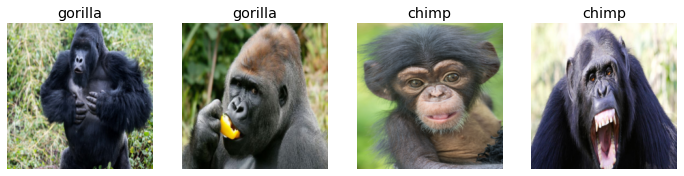

In [12]:
dls.valid.show_batch(max_n=4, nrows=1)

In [13]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.249533,0.276976,0.089286,00:28


epoch,train_loss,valid_loss,error_rate,time
0,0.426564,0.068995,0.017857,00:33
1,0.297557,0.013819,0.000000,00:32
2,0.229367,0.006146,0.000000,00:31
3,0.187136,0.006097,0.000000,00:31


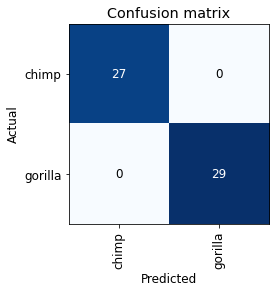

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [15]:
learn.export()

In [16]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [17]:
learn_inf = load_learner(path/'export.pkl')

In [18]:
learn_inf.dls.vocab

['chimp', 'gorilla']

In [19]:
import ipywidgets

In [20]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [21]:
img = PILImage.create(btn_upload.data[-1])


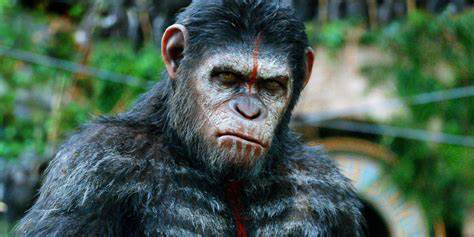

In [22]:
img

In [23]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [24]:
pred,pred_idx,probs = learn_inf.predict(img)

In [25]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: chimp; Probability: 0.8632')

In [26]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [27]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [28]:
btn_upload = widgets.FileUpload()

In [29]:
VBox([widgets.Label('Select your ape!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

IndexError: list index out of range

In [31]:
!jupyter serverextension enable voila

Enabling: voila
- Writing config: C:\Users\Theo\.jupyter
    - Validating...
      voila 0.2.4 ok
